In [7]:
import pandas as pd
import numpy as np

def generate_large_dataset(num_samples=1000):
    np.random.seed(42)  # For reproducibility
    texts = []
    sentiments = []

    positive_texts = ['I love this product', 'Amazing quality', 'Excellent service', 'Great, very satisfied', 'Fantastic', 'Wonderful']
    negative_texts = ['This is the worst experience', 'Terrible, would not recommend', 'Awful, never buying again', 'Bad experience', 'Horrible', 'Not good']
    neutral_texts = ['Pretty decent', 'Could be better']

    for _ in range(num_samples):
        sentiment = np.random.choice([0, 1, 2])
        if sentiment == 2:
            text = np.random.choice(positive_texts)
        elif sentiment == 0:
            text = np.random.choice(negative_texts)
        else:
            text = np.random.choice(neutral_texts)
        
        texts.append(text)
        sentiments.append(sentiment)
    
    df = pd.DataFrame({
        'text': texts,
        'sentiment': sentiments
    })
    
    df.to_csv('sentiment_data.csv', index=False)

generate_large_dataset()


Fuzzy Predictions: [1 1 0 0 2 2 1 2 1 2 0 0 2 1 2 0 0 1 0 0 1 2 1 2 1 2 1 0 0 2 0 1 2 0 2 2 0
 2 2 0 2 0 0 0 0 0 0 1 2 2 0 2 1 2 0 2 1 0 1 1 0 0 1 0 2 2 1 0 2 1 1 2 1 1
 2 1 2 1 0 1 0 1 1 2 0 1 2 1 2 2 1 1 2 2 0 1 2 1 1 2 1 2 1 1 0 2 0 1 2 1 2
 1 1 1 1 2 1 0 2 1 0 1 1 0 1 0 1 0 1 1 2 1 0 2 1 2 2 2 1 2 2 0 1 2 0 2 2 0
 1 0 1 0 2 1 2 2 1 1 2 2 2 1 1 0 2 1 1 2 0 0 1 0 0 0 2 0 1 1 2 1 2 0 1 1 0
 0 2 1 0 1 2 0 0 2 1 2 0 1 1 0]
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4522 - loss: 1.1060
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7026 - loss: 0.6510 
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8497 - loss: 0.5458
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8428 - loss: 0.4542
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8836 - loss: 0.3616
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8764 - loss: 0.3172
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8938 - loss: 0.2734
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8927 - loss: 0.2501 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8822 - loss: 0.2454 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8842 - loss: 0.2299 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


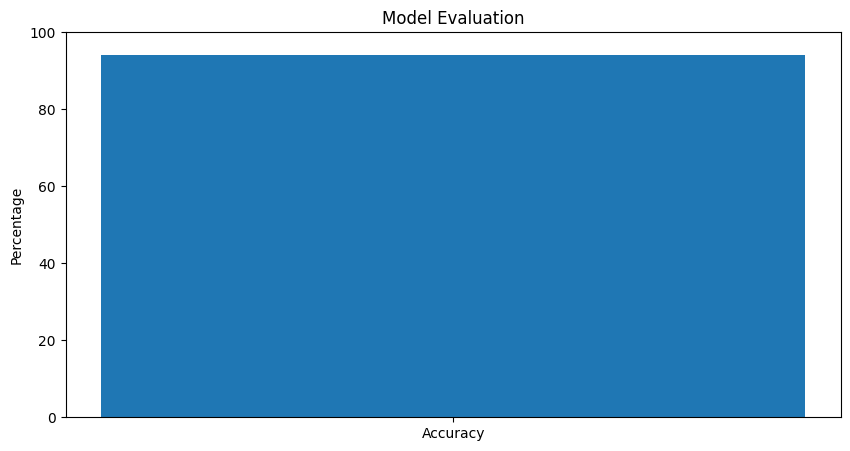

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        74
           1       1.00      1.00      1.00        60
           2       0.85      1.00      0.92        66

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.94       200



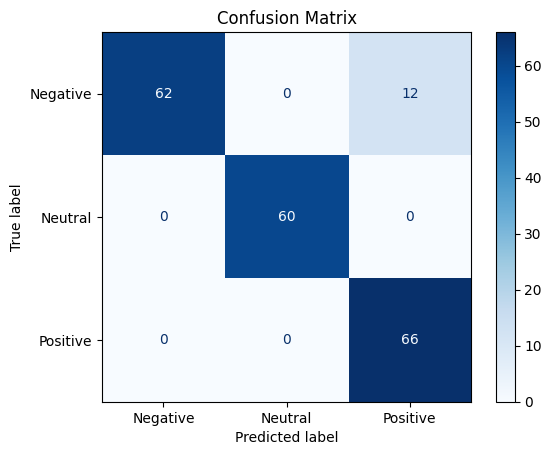

Adjusted Model Accuracy: 0.94


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
def load_data(filepath):
    data = pd.read_csv(filepath)  # Corrected path syntax
    return data

# Preprocess the data
def preprocess_data(data):
    X = data['text']
    y = data['sentiment']
    return X, y

# Define the fuzzy rule-based system (simplified version)
def fuzzy_system(input_data):
    def fuzzy_rule(text):
        positive_keywords = ['love', 'amazing', 'excellent', 'great', 'fantastic', 'wonderful']
        negative_keywords = ['worst', 'terrible', 'awful', 'horrible', 'bad']
        
        # Simple fuzzy rules based on keyword presence
        score = 0
        for word in positive_keywords:
            if word in text.lower():
                score += 1
        for word in negative_keywords:
            if word in text.lower():
                score -= 1
        
        # Define sentiment based on score
        if score > 0:
            return 2  # Adjusted label for positive sentiment
        elif score < 0:
            return 0  # Adjusted label for negative sentiment
        else:
            return 1  # Neutral sentiment
    
    return np.array([fuzzy_rule(text) for text in input_data])

# Convert text data to numerical data using a simple encoding
def text_to_numeric(train_data, test_data):
    vectorizer = tf.keras.layers.TextVectorization(max_tokens=1000, output_mode='int', output_sequence_length=50)
    vectorizer.adapt(train_data)
    X_train_vec = vectorizer(train_data)
    X_test_vec = vectorizer(test_data)
    return X_train_vec, X_test_vec

# Build and train a deep learning model
def build_and_train_model(X_train, y_train):
    input_dim = X_train.shape[1]  # This should match the output dimension of the TextVectorization layer
    
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')  # Output layer for 3 classes
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32)
    return model

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)
    return accuracy, y_pred_classes, conf_matrix

# Plot evaluation results
def plot_evaluation_results(accuracy, y_test, y_pred_classes, conf_matrix):
    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.bar(['Accuracy'], [accuracy * 100])
    plt.title('Model Evaluation')
    plt.ylim(0, 100)
    plt.ylabel('Percentage')
    plt.show()
    
    # Print classification report
    print(classification_report(y_test, y_pred_classes))
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Neutral', 'Positive'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Main function to run the analysis
def main():
    # Load and preprocess the data
    data = load_data('/kaggle/input/sentiment/sentiment_data.csv')  # Corrected path
    X, y = preprocess_data(data)
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the fuzzy rule-based system
    fuzzy_predictions = fuzzy_system(X_test)
    print("Fuzzy Predictions:", fuzzy_predictions)
    
    # Convert text data to numerical data for deep learning model
    X_train_vec, X_test_vec = text_to_numeric(X_train, X_test)
    
    # Train the deep learning model
    model = build_and_train_model(X_train_vec, y_train)
    
    # Evaluate the model
    accuracy, y_pred_classes, conf_matrix = evaluate_model(model, X_test_vec, y_test)
    
    # Plot the evaluation results
    plot_evaluation_results(accuracy, y_test, y_pred_classes, conf_matrix)
    
    print("Adjusted Model Accuracy:", accuracy)

if __name__ == "__main__":
    main()
